# Business Understanding

Loan prediction is a critical task in the banking and financial industry, where the goal is to assess the creditworthiness of loan applicants and predict whether they are likely to repay the loan or default on their payments. The business understanding part of loan prediction involves gaining a clear understanding of the problem, its significance, and the specific objectives of the prediction model.
The primary objective of loan prediction is to minimize the risk of default and financial losses for the lending institution. By accurately assessing the creditworthiness of loan applicants, the bank can make informed decisions about approving or rejecting loan applications. This process helps maintain a healthy loan portfolio, minimize defaults, and maximize profitability.
To build an effective loan prediction model, it is essential to have access to historical loan data that includes information about borrowers, their financial attributes, loan terms, and whether they have repaid the loan or defaulted in the past. The availability and quality of data play a crucial role in the accuracy and reliability of the prediction model.
The target variable in loan prediction is typically binary, indicating whether a borrower will default (1) or not (0) on their loan repayment. This variable is used to train the prediction model, making it capable of classifying new loan applications into default or non-default categories.

# Data Understanding

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Description:

In [483]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [484]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [485]:
train.shape

(614, 13)

In [486]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [487]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

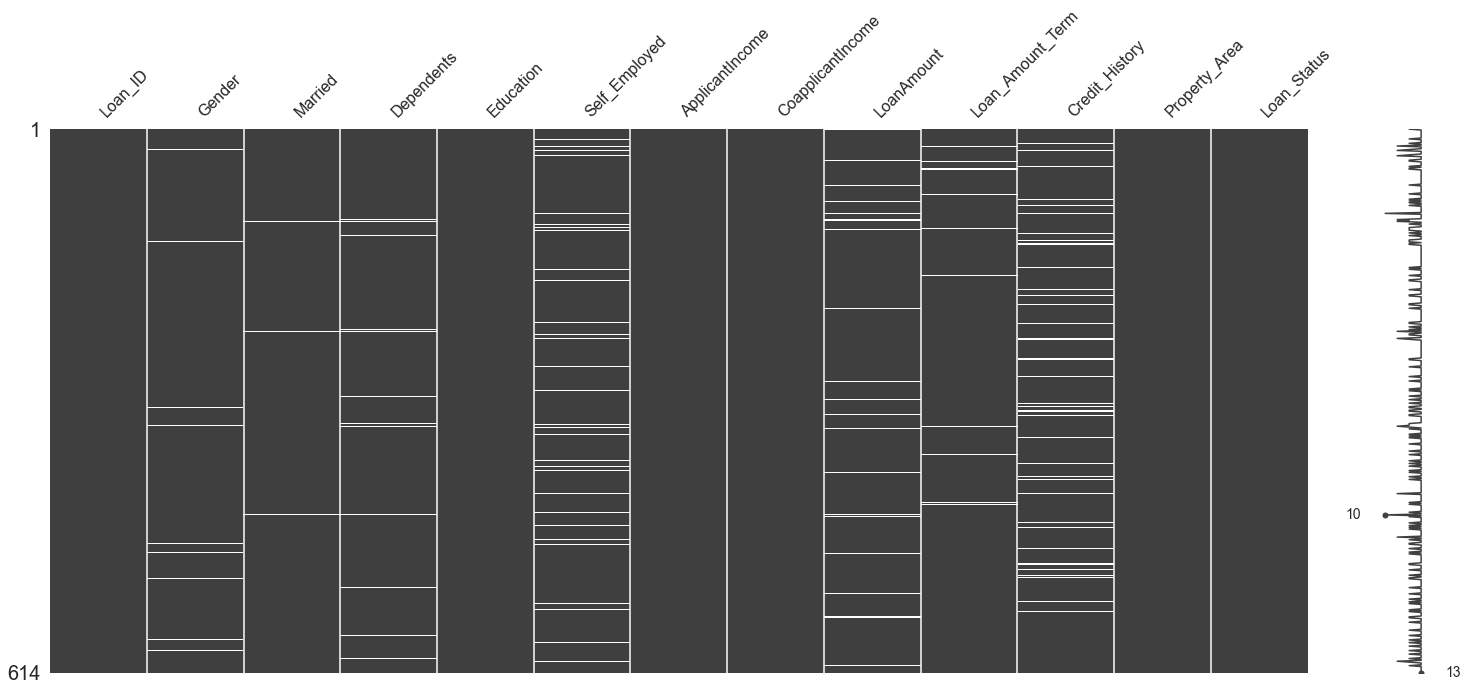

In [488]:
msno.matrix(train)

#### General Information:

- The dataset contains 614 entries (rows) and 13 columns.
- The columns are a mix of different data types: 8 object (categorical), 4 float64 (numeric), and 1 int64 (numeric).

#### Missing Values:

- The 'Gender' column has 13 missing values.
- The 'Married' column has 3 missing values.
- The 'Dependents' column has 15 missing values.
- The 'Self_Employed' column has 32 missing values.
- The 'LoanAmount' column has 22 missing values.
- The 'Loan_Amount_Term' column has 14 missing values.
- The 'Credit_History' column has 50 missing values.

#### Data quality issues and how to deal with them:

1) These missing values need to be addressed before conducting further analysis or modeling on the dataset. Depending on the specific context and goals, various techniques such as imputation or exclusion of incomplete rows can be applied to handle the missing data.

2) Categorical variables like Married, Education, Self_Employed, Property_Area and Loan_Status need to be encoded before they are used as input for machine learning algorithms. Encoding categorical variables is important because most machine learning models can only handle numerical data. 

3) The final step in data preparation would be the normalization of numeric attributes. As we can notice in our data, attributes like ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term have different scales and distributions, that's why we should transform them so that they have the same scale.

## Data Exploration:

In [489]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Summary Statistics:

ApplicantIncome:

- The mean income of the applicants is approximately 5403.46.
- The standard deviation is around 6109.04, indicating a significant variation in incomes.
- The minimum and maximum incomes are 150 and 81000, respectively.
- The median (50th percentile) income is 3812.5.
- The 25th and 75th percentiles are 2877.5 and 5795, respectively.

CoapplicantIncome:

- The mean co-applicant income is approximately 1621.25.
- The standard deviation is around 2926.25, indicating a wide range of co-applicant incomes.
- The minimum co-applicant income is 0, while the maximum is 41667.
- The median (50th percentile) co-applicant income is 1188.5.
- The 25th and 75th percentiles are 0 and 2297.25, respectively.

LoanAmount:

- The mean loan amount is approximately 146.41.
- The standard deviation is around 85.59, indicating some variability in loan amounts.
- The minimum and maximum loan amounts are 9 and 700, respectively.
- The median (50th percentile) loan amount is 128.
- The 25th and 75th percentiles are 100 and 168, respectively.

Loan_Amount_Term:

- The mean loan term is approximately 342 months (or 28.5 years).
- The standard deviation is around 65.12 months.
- The minimum loan term is 12 months, and the maximum is 480 months (or 40 years).
- The median (50th percentile) loan term is 360 months (or 30 years).
- The 25th and 75th percentiles are also 360 months.

Credit_History:

- The credit history column contains values of either 0 or 1.
- The mean credit history value is approximately 0.842, indicating a higher proportion of applicants with a good credit history.
- The standard deviation is around 0.365.

Text(0.5, 1.0, 'Distribution of Gender')

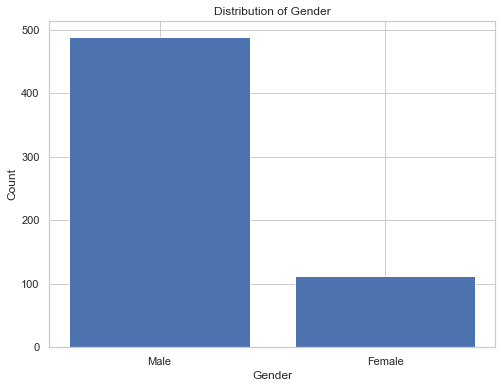

In [490]:
fig,ax=plt.subplots(figsize=(8,6))
gender_counts = train['Gender'].value_counts()
sns.set()
# Plot the bar chart
ax.bar(gender_counts.index, gender_counts)

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender')

In [491]:
'''import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
gender=train['Gender'].value_counts()
data=[go.Bar(x=gender.index, y=gender.values)]
plotly.offline.iplot(data)'''

"import plotly\nplotly.offline.init_notebook_mode(connected=True)\nimport plotly.graph_objs as go\ngender=train['Gender'].value_counts()\ndata=[go.Bar(x=gender.index, y=gender.values)]\nplotly.offline.iplot(data)"

### Gender Distribution:
- The dataset consists of two main gender categories: Male and Female.
- Among the 614 observations in the dataset, there are approximately 500 males and around 100 females.
- The gender distribution is imbalanced, with males representing the majority of the dataset.

Text(0.5, 1.0, 'Distribution of Married')

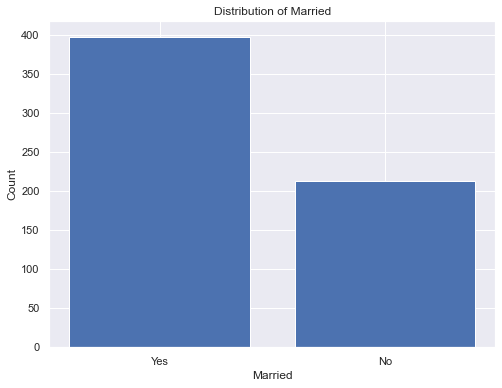

In [492]:
fig,ax=plt.subplots(figsize=(8,6))
married_counts = train['Married'].value_counts()

# Plot the bar chart
ax.bar(married_counts.index, married_counts)

# Add labels and title
ax.set_xlabel('Married')
ax.set_ylabel('Count')
ax.set_title('Distribution of Married')


### Marital Status Distribution:
- The bar plot contains information on two main marital status categories: Married and Unmarried.
- Among the 614 observations in the dataset, approximately 400 individuals are classified as married, while around 210 individuals are classified as unmarried.
- The distribution of marital status is imbalanced, with a larger proportion of married individuals compared to unmarried ones.

Text(0.5, 1.0, 'Distribution of Dependents')

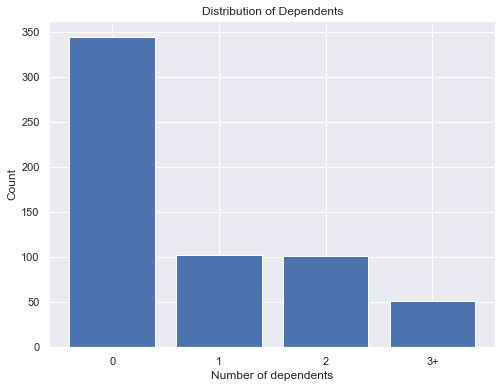

In [493]:
fig,ax=plt.subplots(figsize=(8,6))
dependents_counts = train['Dependents'].value_counts()

# Plot the bar chart
ax.bar(dependents_counts.index, dependents_counts)

# Add labels and title
ax.set_xlabel('Number of dependents')
ax.set_ylabel('Count')
ax.set_title('Distribution of Dependents')


## Dependents Distribution:
- The bar plot above includes information on the number of dependents associated with each observation.
- Among the 614 observations in the dataset, approximately 340 individuals have no dependents, 100 individuals have one dependent, 100 individuals have two dependents, and 50 individuals have three or more dependents.

Text(0.5, 1.0, 'Distribution of Education')

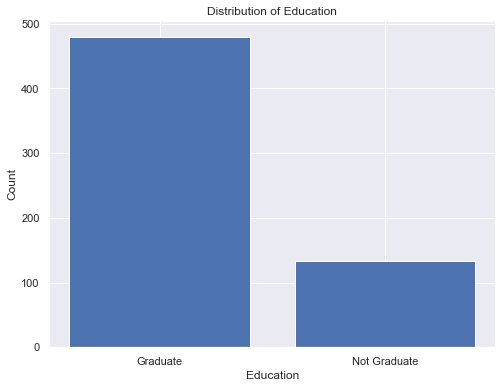

In [494]:
fig,ax=plt.subplots(figsize=(8,6))
education_counts=train['Education'].value_counts()

# Plot the bar chart
ax.bar(education_counts.index, education_counts)

# Add labels and title
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Distribution of Education')

## Education Distribution
- The bar plot above illustrates the distribution of education levels within the dataset.
- There are two main education categories: Graduate and Not Graduate.
- Among the 614 observations in the dataset, approximately 480 individuals are classified as graduates, while around 130 individuals are classified as not graduates.

Text(0.5, 1.0, 'Distribution of Employability')

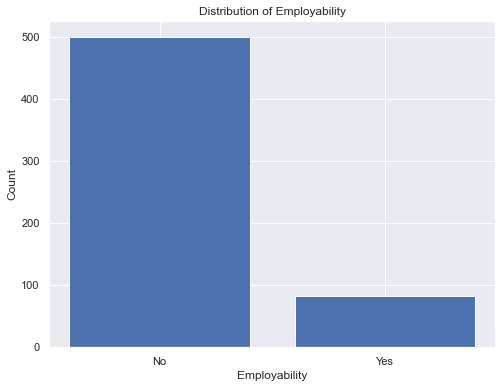

In [495]:
fig,ax=plt.subplots(figsize=(8,6))
employed_counts=train['Self_Employed'].value_counts()

# Plot the bar chart
ax.bar(employed_counts.index, employed_counts)

# Add labels and title
ax.set_xlabel('Employability')
ax.set_ylabel('Count')
ax.set_title('Distribution of Employability')

## Employability Distribution:
- The bar plot above illustrates the distribution of self-employability within the dataset.
- The dataset includes information on two main employability categories: Self Employed (Yes) and Not Self Employed (No).
- Among the 614 observations in the dataset, approximately 500 individuals are classified as not self employed, while around 80 individuals are classified as self employed.

Text(0.5, 1.0, 'Distribution of Property Area')

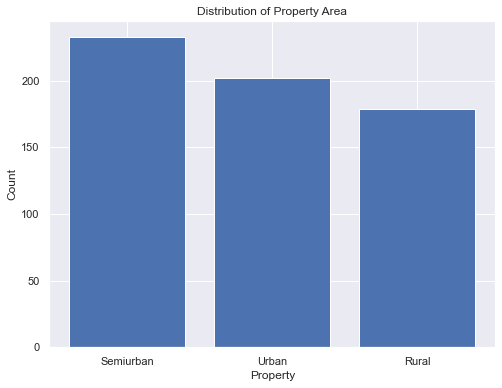

In [496]:
fig,ax=plt.subplots(figsize=(8,6))
property_counts=train['Property_Area'].value_counts()
# Plot the bar chart
ax.bar(property_counts.index, property_counts)

# Add labels and title
ax.set_xlabel('Property')
ax.set_ylabel('Count')
ax.set_title('Distribution of Property Area')

## Property Area Distribution:
- The bar plot above illustrates the distribution of property areas within the dataset.
- The dataset includes information on three main property area categories: Urban, Rural, and Semiurban.
- Among the 614 observations in the dataset, approximately 280 properties are classified as Semiurban, 200 properties are classified as Urban, and 180 properties are classified as Rural.

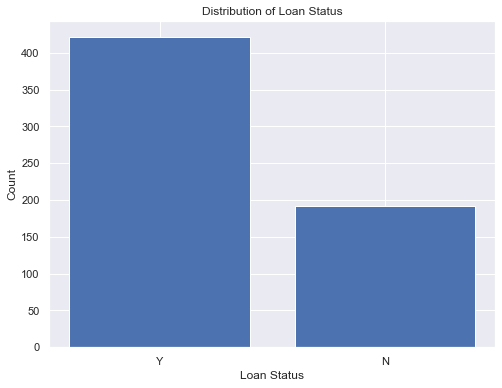

In [497]:
fig,ax=plt.subplots(figsize=(8,6))
loan_status=train['Loan_Status'].value_counts()

# Plot the bar chart
ax.bar(loan_status.index, loan_status)

# Add labels and title
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Status')
sns.set_style('whitegrid')

## Loan Status Distribution:
- The bar plot above illustrates the distribution of loan status within the dataset.
- The target attribute has two main loan status categories: Approved (Yes) and Not Approved (No).
- Among the 614 observations in the dataset, approximately 440 loans are classified as approved, while around 190 loans are classified as not approved.

(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 [<matplotlib.patches.Polygon at 0x206c8478fd0>])

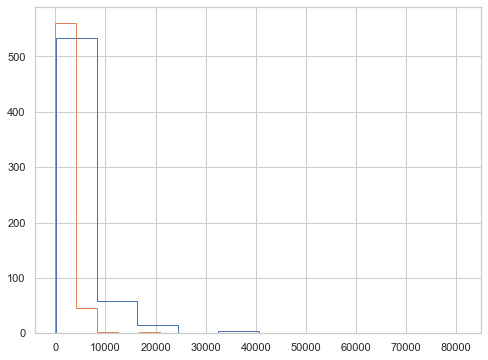

In [498]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('whitegrid')
ax.hist(train['ApplicantIncome'], label='Applicants_Income', histtype='step')
ax.hist(train['CoapplicantIncome'], label='Co_Applicants_Income', histtype='step')

## Applicant Income and Co-applicant Income Distribution:
- The histograms above illustrate the distribution of applicant income and co-applicant income within the dataset.
- The histogram of the applicant income reveals that the majority of applicants have incomes that are generally higher than the co-applicant income.
- The distribution of applicant and co-applicant income appears to be right-skewed, with a longer tail on the right side, indicating the presence of a few high-income outliers.

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

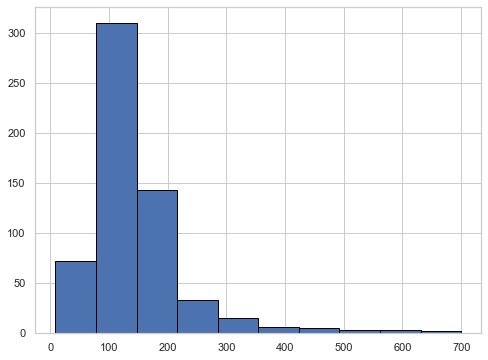

In [499]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('whitegrid')
ax.hist(train['LoanAmount'], label='Loan Amount', edgecolor='Black')


## Loan Amount Distribution:
- The histogram of the loan amount reveals the distribution of loan amounts across different ranges.
- The loan amount distribution is right-skewed, meaning that the majority of loan amounts are concentrated towards the lower end, while fewer loans fall in the higher loan amount ranges.
- The highest frequency, indicated by the peak of the histogram, occurs around 310 dollars, which corresponds to the most common loan amount in the dataset.

<AxesSubplot:>

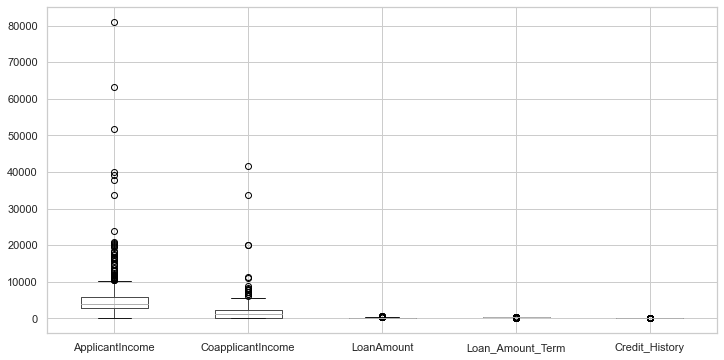

In [500]:
train.boxplot(figsize=(12,6))

## Boxplots: Applicant Income, Co-applicant Income, Loan Amount, Loan Amount Term, and Credit History
- The boxplots above provide a visualization of the distributions of applicant income, co-applicant income, loan amount, loan amount term, and credit history within the dataset.
- The boxplots present a summary of the distribution for each variable, including the median, quartiles, and any outliers.
- However, due to the different scales and the presence of outliers, it can be challenging to directly compare and analyze the variables in a meaningful way.
- The boxplots for applicant income and co-applicant income show significant outliers, suggesting the presence of individuals with exceptionally high incomes. 

We should consider applying data transformation techniques to address the issue of differing scales and outliers. These techniques can help to normalize the distributions and bring them to a more comparable range.

<Figure size 1080x1080 with 0 Axes>

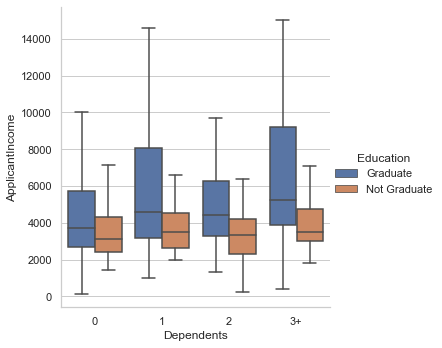

In [501]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.catplot(x='Dependents', y='ApplicantIncome', data=train, kind='box', hue='Education', sym='')

## Boxplot: Applicant Income by Number of Dependents and Education Level
- The boxplots above illustrate the distribution of applicant income based on the number of dependents, considering different education levels.
- By considering outliers as normal data using sym='', we can focus on the overall distribution and identify patterns in applicant income across different categories.
- The boxplots reveal that the income of individuals with a graduate education level tends to be higher compared to those with an undergraduate level. This difference is evident across all numbers of dependents.
- Furthermore, the boxplots indicate that individuals with 3 or more dependents tend to have higher incomes compared to those with fewer dependents.
- Specifically, the median incomes for individuals with an undergraduate education level are all below 4000 dollars, while the median incomes for those with a graduate education level are around or above 4000 dollars.

<Figure size 1080x1080 with 0 Axes>

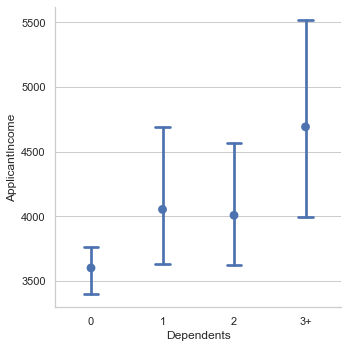

In [502]:
plt.figure(figsize=(15,15))
from numpy import median
sns.set_style('whitegrid')
sns.catplot(x='Dependents', y='ApplicantIncome', data=train, kind='point', capsize=0.2, join=False, estimator=median)

## Point Plot: Median Applicant Income by Number of Dependents:
- This plot allows us to visualize the median applicant income for different numbers of dependents without explicitly distinguishing between education levels. 
- The plot suggests that individuals with 3 or more dependents tend to have higher median incomes compared to those with fewer dependents.

<AxesSubplot:xlabel='Gender', ylabel='count'>

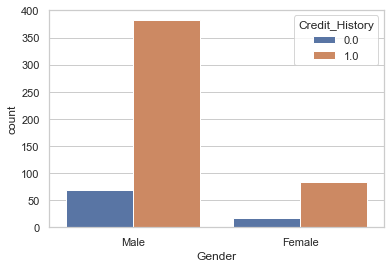

In [503]:
sns.set_style('whitegrid')
sns.countplot(x='Gender', data=train, hue='Credit_History')

## Count Plot: Gender and Credit History
- The count plot above illustrates the number of individuals by gender, separated by credit history status (0 and 1).
- The bars are distinguished by two different colors: blue for credit history status 0 and orange for credit history status 1.
- Among the male applicants, the count of individuals without a credit history (credit history status 0) is above 50, whereas the count of those with a credit history (credit history status 1) is around 380.
- On the other hand, the number of female applicants is significantly lower in both categories. There are approximately 90 females with a credit history (credit history status 1) and around 10 without a credit history (credit history status 0).

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

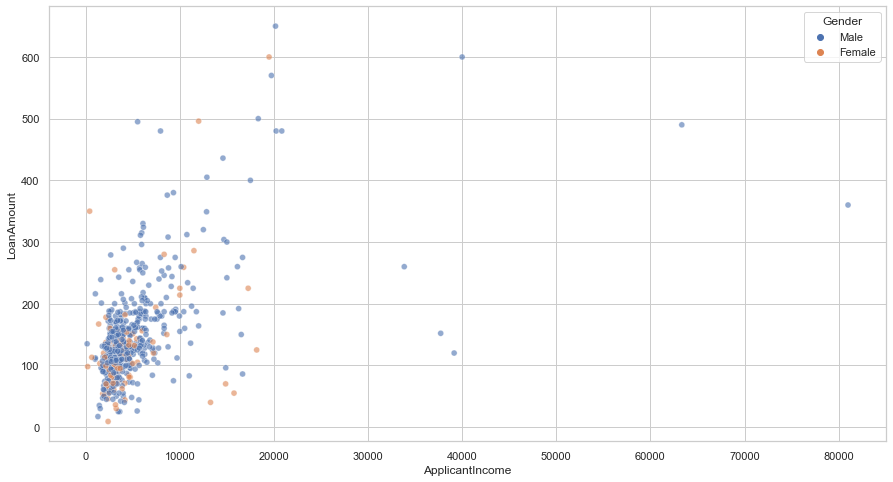

In [504]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train, hue='Gender', alpha=0.6)

## Scatter Plot: Applicant Income vs. Loan Amount
- The scatter plot above displays the relationship between the applicant's income and the loan amount, with gender represented by different colors.
- Most of the loan applications in the dataset have relatively low to moderate loan amounts and applicant incomes, concentrated between 0 and 20000.
- However, there are a few data points that lie between 20000 and 80000, all of which correspond to male applicants.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

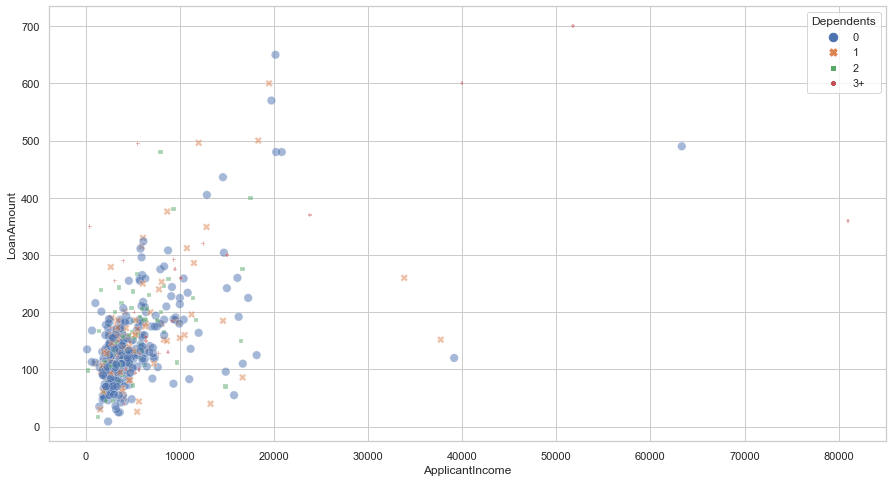

In [505]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount', data=train, hue='Dependents', size='Dependents',style='Dependents', alpha=0.5)

## Scatter Plot: Applicant Income vs. Loan Amount
- The scatter plot above displays the relationship between the applicant's income and the loan amount, with the number of dependents represented by different colors, sizes, and styles.
- Most of the points are concentrated between 0 and 20000 on the applicant income axis and between 0 and 300 on the loan amount axis.
- The majority of applicants with 0 dependents (blue points) have lower incomes and loan amounts within this range.
- There are a significant number of orange crosses (representing applicants with 1 dependent) and green squares (representing applicants with 2 dependents) scattered throughout this range as well.
- Additionally, there are a few red points (representing applicants with 3 or more dependents) within this range, indicating higher income and loan amounts for those individuals.
- Some crosses and blue points are also visible between 20000 and 80000 on the applicant income axis, suggesting a subset of applicants with higher incomes and loan amounts, regardless of the number of dependents.

<Figure size 1080x576 with 0 Axes>

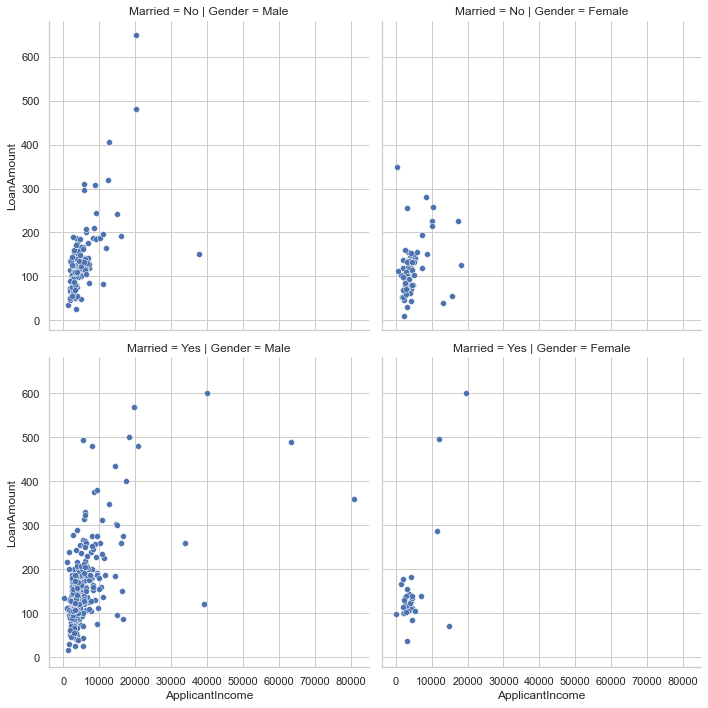

In [506]:
plt.figure(figsize=(15,8))
sns.relplot(x='ApplicantIncome',y='LoanAmount', data=train, kind='scatter', col='Gender',row='Married')

## Scatter Plot Grid: Applicant Income vs. Loan Amount
- The scatter plot grid above displays the relationship between the applicant's income and the loan amount, with each plot organized based on the categories of the "Married" and "Gender" variables.
- The scatter plot grid allows for a visual comparison of the relationship between the applicant's income and loan amount across various combinations of the "Married" and "Gender" categories.
- It is evident that the scatter plot corresponding to the combination "Married: Yes" and "Gender: Male" contains the highest number of points, indicating a larger sample size for this category.
- Conversely, the scatter plot corresponding to the combination "Married: Yes" and "Gender: Female" contains the fewest points, suggesting a smaller sample size for this category.
- Despite the varying number of points, the overall shape of the scatter plots remains consistent, indicating a similar relationship between income and loan amount regardless of marital status and gender.

<Figure size 1080x576 with 0 Axes>

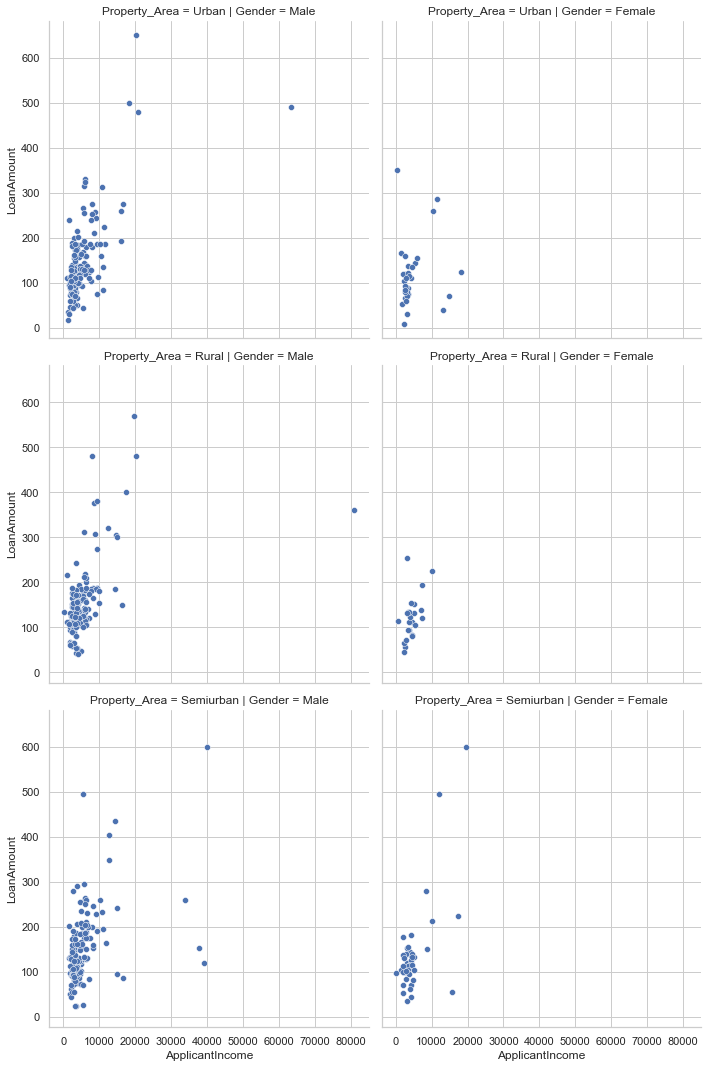

In [507]:
plt.figure(figsize=(15,8))
sns.relplot(x='ApplicantIncome',y='LoanAmount', data=train, kind='scatter', col='Gender',row='Property_Area')

## Scatter Plot Grid: Applicant Income vs. Loan Amount
- The scatter plot grid allows for a visual comparison of the relationship between the applicant's income and loan amount across various combinations of the "Gender" and "Property_Area" categories.
- Notably, the scatter plot corresponding to the combination "Gender: Male" and "Property_Area: Urban" contains the highest number of points, indicating a larger sample size for this category.
- On the other hand, the scatter plot corresponding to the combination "Gender: Female" and "Property_Area: Rural" contains the fewest points, suggesting a smaller sample size for this category.
- Despite the variation in the number of points, the overall shape of the scatter plots remains consistent, implying a similar relationship between income and loan amount across the different "Gender" and "Property_Area" categories.

<Figure size 1080x576 with 0 Axes>

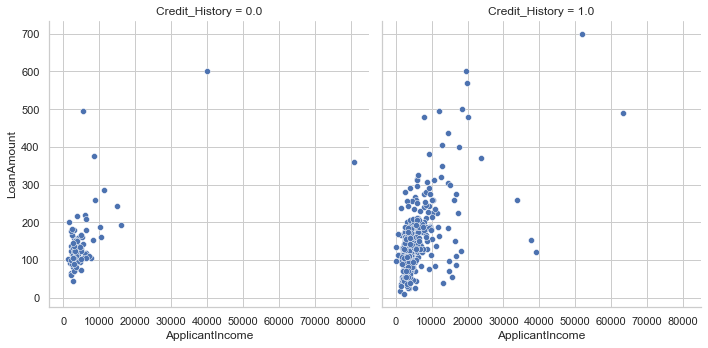

In [508]:
plt.figure(figsize=(15,8))
sns.relplot(x='ApplicantIncome',y='LoanAmount', data=train, kind='scatter', col='Credit_History')

## Scatter Plot Grid: Applicant Income vs. Loan Amount
- The scatter plot grid allows for a visual comparison of the relationship between the applicant's income and loan amount across different categories of the "Credit_History" variable.
- Notably, the scatter plot corresponding to the category "Credit_History: 1" contains the highest number of points, indicating a larger sample size for applicants with a credit history.
- On the other hand, the scatter plot corresponding to the category "Credit_History: 0" contains a smaller number of points, suggesting a smaller sample size for applicants without a credit history.
- Despite the variation in the number of points, the overall shape of the scatter plots remains consistent, implying a similar relationship between income and loan amount for both categories of the "Credit_History" variable.

<Figure size 1080x576 with 0 Axes>

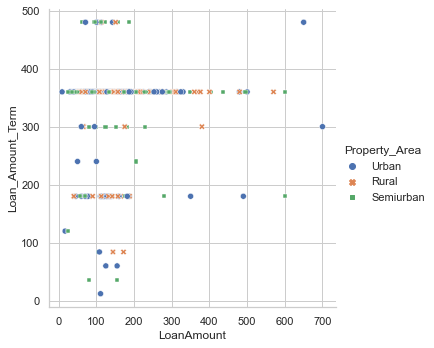

In [509]:
plt.figure(figsize=(15,8))
sns.relplot(x="LoanAmount", y="Loan_Amount_Term", 
            data=train, kind="scatter", 
            ci=None, style="Property_Area", 
            hue="Property_Area", dashes=False, markers=True)

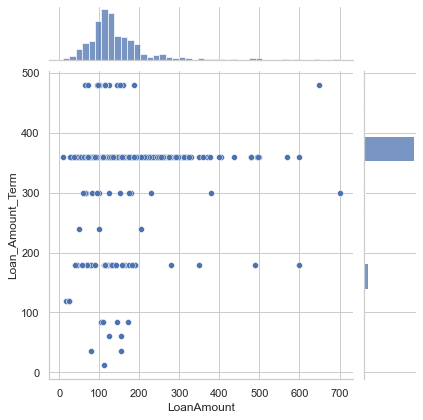

In [510]:
sns.jointplot(x=train["LoanAmount"], y=train["Loan_Amount_Term"])

## Scatter Plot / Jointplot: Loan Amount vs. Loan Amount Term
- The scatter plot and jointplot allow for a visual assessment of the relationship between the loan amount and the loan amount term, considering different categories of the "Property_Area" variable.
- It is evident that the loan amount term of 360 days is the most common across all property areas, as indicated by the concentration of data points around this value.
- The loan amount exhibits variation, ranging from 0 to 600. However, the majority of loan amounts are concentrated between 0 and 300.
- The differentiation of markers by "Property_Area" provides additional information on the distribution of loan amounts across different property areas. This differentiation helps identify any potential patterns or differences in loan amounts based on property area.

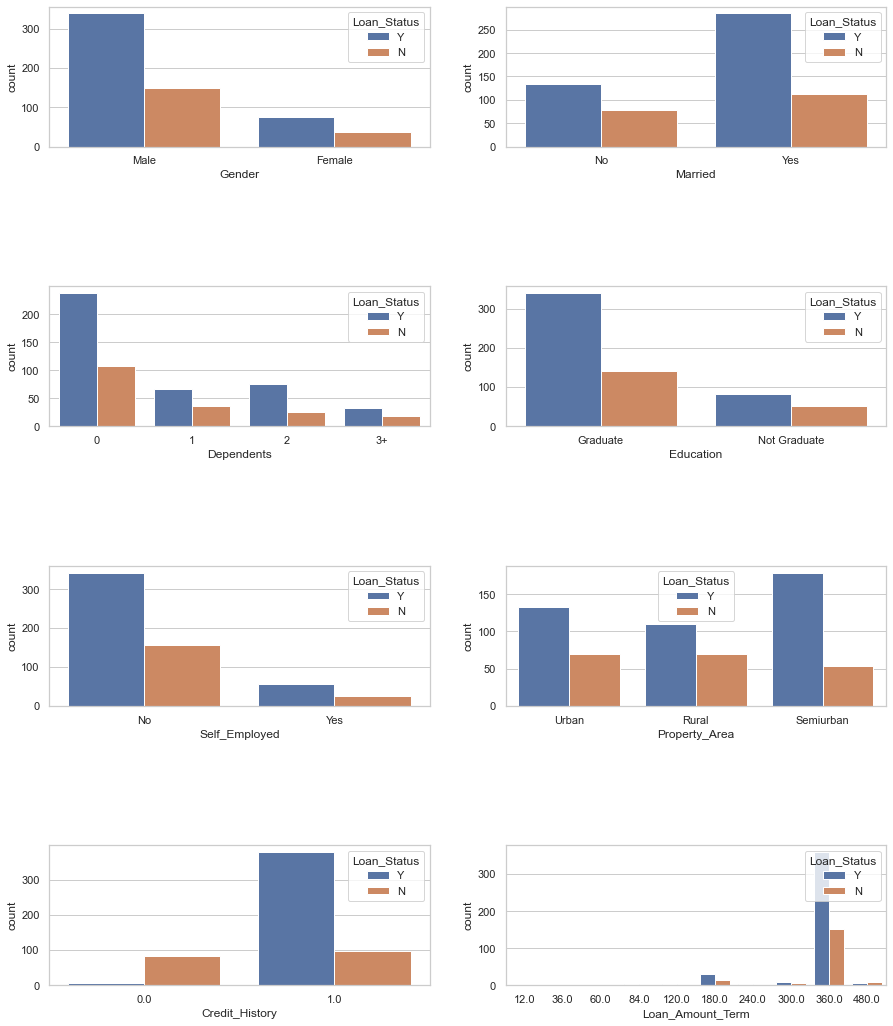

In [511]:
fig,axes = plt.subplots(4,2,figsize=(15,18))
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


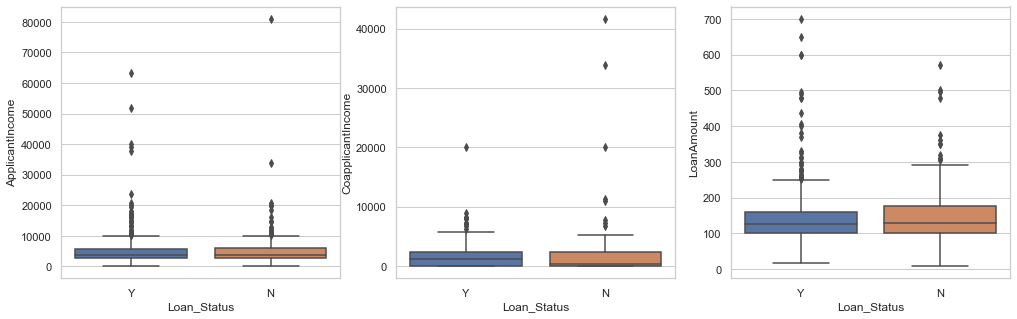

In [512]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train,x='Loan_Status',ax=axes[idx])

print(train[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

<AxesSubplot:>

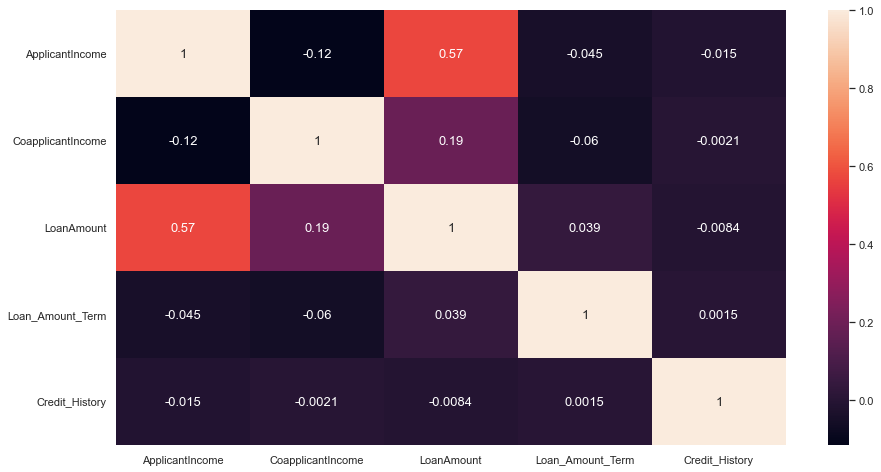

In [513]:
#Correlation matrix
corr = train.corr()

# Select columns with a correlation coefficient above a certain threshold
#corr = corr[corr > 0.5]

# "mask" is used to show only the upper or the lower part of the heatmap
#mask = np.triu(np.ones_like(corr_filtered, dtype=bool)) 

# Create a heatmap of the correlated columns
f, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(corr, annot=True, annot_kws={'size':13})

# Data Preparation

gender: mode imputation
married: mode
Dependents: knn         
Self_Employed :  knn      
LoanAmount : regression 
Loan_Amount_Term: knn   
Credit_History  : regression

## Handling Missing Values

In [514]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [515]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')
train[['Gender','Married','Dependents','Self_Employed']]=mode_imputer.fit_transform(train[['Gender','Married','Dependents','Self_Employed']])

In [516]:
# Interpolate missing values using linear interpolation
train[train['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [517]:
# Interpolate missing values using linear interpolation
train['Loan_Amount_Term']= train['Loan_Amount_Term'].interpolate(method='linear')

In [518]:
train.iloc[[19,36,44,75,45,73],:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,Y
75,LP001255,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,N
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,360.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,330.0,0.0,Semiurban,N


In [519]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For the rest of missing data we'll encode the categorical columns in order to use regression logistic on the Credit_History column and linear regression on the LoanAmount column

In order to apply knn technique to impute the Dependents column, we should first encode its values. For that we're going to use ordinal encoding.

In [520]:
'''from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=6)
train['Dependents']=knn_imputer.fit _transform(train['Dependents'].values.reshape(-1, 1))'''

"from sklearn.impute import KNNImputer\nknn_imputer = KNNImputer(n_neighbors=6)\ntrain['Dependents']=knn_imputer.fit _transform(train['Dependents'].values.reshape(-1, 1))"

In [521]:
#train.iloc[[102,104,120,226,228,293,301,332,335,346,517,597],:]

In [522]:
train[train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [523]:
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
train_reg_data = train[train['LoanAmount'].notnull()]
test_reg_data = train[train['LoanAmount'].isnull()]

# Split train data into features (X) and target variable (y)
X_train = train_reg_data[['ApplicantIncome']]
y_train = train_reg_data['LoanAmount']

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing LoanAmount values
X_test = test_reg_data[['ApplicantIncome']]
y_pred = model.predict(X_test)

# Replace missing values with predicted values
train.loc[train['LoanAmount'].isnull(), 'LoanAmount'] = y_pred


In [524]:
train.iloc[[0,35,63,81,95,102,103,113],:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,149.937265,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,121.606184,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,142.771261,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,122.557423,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,157.333151,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,211.775755,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,140.448651,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,162.636311,360.0,1.0,Semiurban,Y


In [525]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,149.937265,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Encoding categorical data (correlation)

In [526]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
df_encoded = train.copy()

# Specify the columns you want to label encode
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Initialize the LabelEncoder
le = LabelEncoder()

# Label encode the specified columns
df_encoded[columns_to_encode] = df_encoded[columns_to_encode].apply(lambda x: le.fit_transform(x))

# Preview the encoded DataFrame
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,149.937265,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [527]:
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'Dependents', 'mapping': {'0': 0,'1': 1, '2': 2, '3+': 3}}]
enc = OrdinalEncoder(mapping=maplist)
df_encoded=enc.fit_transform(df_encoded)
df_encoded['Dependents'].replace({-1:np.nan}, inplace=True)

## Normalization

Now we need to standardize the ApplicantIncome, CoapplicantIncome, LoanAmount and Loan_Amount_Term columns.

In [528]:
from sklearn.preprocessing import MinMaxScaler

# Select the column to be standardized
column_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply z-score scaling to the selected column
df_encoded[column_to_scale] = scaler.fit_transform(df_encoded[column_to_scale])

# Preview the standardized column
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.203961,0.74359,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


In [529]:
from sklearn.linear_model import LogisticRegression

# Create a new DataFrame with non-null values in the "Credit_History" column
df_train = df_encoded.dropna(subset=['Credit_History'])

# Separate the features and the target variable
X = df_train.drop(['Credit_History','Loan_ID'], axis=1)
y = df_train['Credit_History']

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Identify the rows with missing values in the "Credit_History" column
missing_data = df_encoded[df_encoded['Credit_History'].isnull()]

# Extract the features for the missing data rows
X_missing = missing_data.drop(['Credit_History','Loan_ID'], axis=1)

# Predict the missing values using the trained model
imputed_values = logreg.predict(X_missing)

# Replace the missing values with the predicted values in the original DataFrame
df_encoded.loc[df_encoded['Credit_History'].isnull(), 'Credit_History'] = imputed_values


# Preview the imputed "Credit_History" column
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.203961,0.74359,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


In [530]:
imputed_values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [531]:
df_encoded.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [532]:
# Replace the missing values with the predicted values in the original DataFrame
train.loc[train['Credit_History'].isnull(), 'Credit_History'] = imputed_values

In [533]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [534]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,149.937265,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Now we'll use the same methods to impute the missingg values of the test set.

In [535]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [536]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')
test[['Gender','Married','Dependents','Self_Employed']]=mode_imputer.fit_transform(test[['Gender','Married','Dependents','Self_Employed']])

In [537]:
# Interpolate missing values using linear interpolation
test['Loan_Amount_Term']= test['Loan_Amount_Term'].interpolate(method='linear')

In [538]:
from sklearn.linear_model import LinearRegression

# Split data into train and test sets
test_train_reg_data = test[test['LoanAmount'].notnull()]
ttest_reg_data = test[test['LoanAmount'].isnull()]

# Split train data into features (X) and target variable (y)
X_train = test_train_reg_data[['ApplicantIncome']]
y_train = test_train_reg_data['LoanAmount']

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing LoanAmount values
X_test = ttest_reg_data[['ApplicantIncome']]
y_pred = model.predict(X_test)

# Replace missing values with predicted values
test.loc[test['LoanAmount'].isnull(), 'LoanAmount'] = y_pred


In [539]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
dftest_encoded = test.copy()

# Specify the columns you want to label encode
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Initialize the LabelEncoder
le = LabelEncoder()

# Label encode the specified columns
dftest_encoded[columns_to_encode] = dftest_encoded[columns_to_encode].apply(lambda x: le.fit_transform(x))

# Preview the encoded DataFrame
dftest_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [540]:
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'Dependents', 'mapping': {'0': 0,'1': 1, '2': 2, '3+': 3}}]
enc = OrdinalEncoder(mapping=maplist)
dftest_encoded=enc.fit_transform(dftest_encoded)
dftest_encoded['Dependents'].replace({-1:np.nan}, inplace=True)

In [541]:
dftest_encoded.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [542]:
from sklearn.preprocessing import MinMaxScaler

# Select the column to be standardized
column_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply z-score scaling to the selected column
dftest_encoded[column_to_scale] = scaler.fit_transform(dftest_encoded[column_to_scale])

# Preview the standardized column
dftest_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,0.078865,0.000000,0.157088,0.746835,1.0,2
1,LP001022,1,1,1,0,0,0.042411,0.062500,0.187739,0.746835,1.0,2
2,LP001031,1,1,2,0,0,0.068938,0.075000,0.344828,0.746835,1.0,2
3,LP001035,1,1,2,0,0,0.032263,0.106083,0.137931,0.746835,NaN,2
4,LP001051,1,0,0,1,0,0.045168,0.000000,0.095785,0.746835,1.0,2


In [543]:
# Create a new DataFrame with non-null values in the "Credit_History" column
testdf_train = dftest_encoded.dropna(subset=['Credit_History'])

# Separate the features and the target variable
X = testdf_train.drop(['Credit_History','Loan_ID'], axis=1)
y = testdf_train['Credit_History']

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Identify the rows with missing values in the "Credit_History" column
missing_data = dftest_encoded[dftest_encoded['Credit_History'].isnull()]

# Extract the features for the missing data rows
X_missing = missing_data.drop(['Credit_History','Loan_ID'], axis=1)

# Predict the missing values using the trained model
imputed_values = logreg.predict(X_missing)

# Replace the missing values with the predicted values in the original DataFrame
dftest_encoded.loc[dftest_encoded['Credit_History'].isnull(), 'Credit_History'] = imputed_values


# Preview the imputed "Credit_History" column
dftest_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,0.078865,0.000000,0.157088,0.746835,1.0,2
1,LP001022,1,1,1,0,0,0.042411,0.062500,0.187739,0.746835,1.0,2
2,LP001031,1,1,2,0,0,0.068938,0.075000,0.344828,0.746835,1.0,2
3,LP001035,1,1,2,0,0,0.032263,0.106083,0.137931,0.746835,1.0,2
4,LP001051,1,0,0,1,0,0.045168,0.000000,0.095785,0.746835,1.0,2


In [544]:
# Replace the missing values with the predicted values in the original DataFrame
test.loc[test['Credit_History'].isnull(), 'Credit_History'] = imputed_values

In [545]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Modeling

In the modeling phase, we will train and evaluate machine learning models to predict the loan approval status based on the available dataset. We will use various algorithms such as logistic regression, decision trees, random forests, or support vector machines. The dataset is already divided into two parts: the training set and the validation set. The training set will be used to train the models, while the validation set will be used to assess their performance and choose the best model.

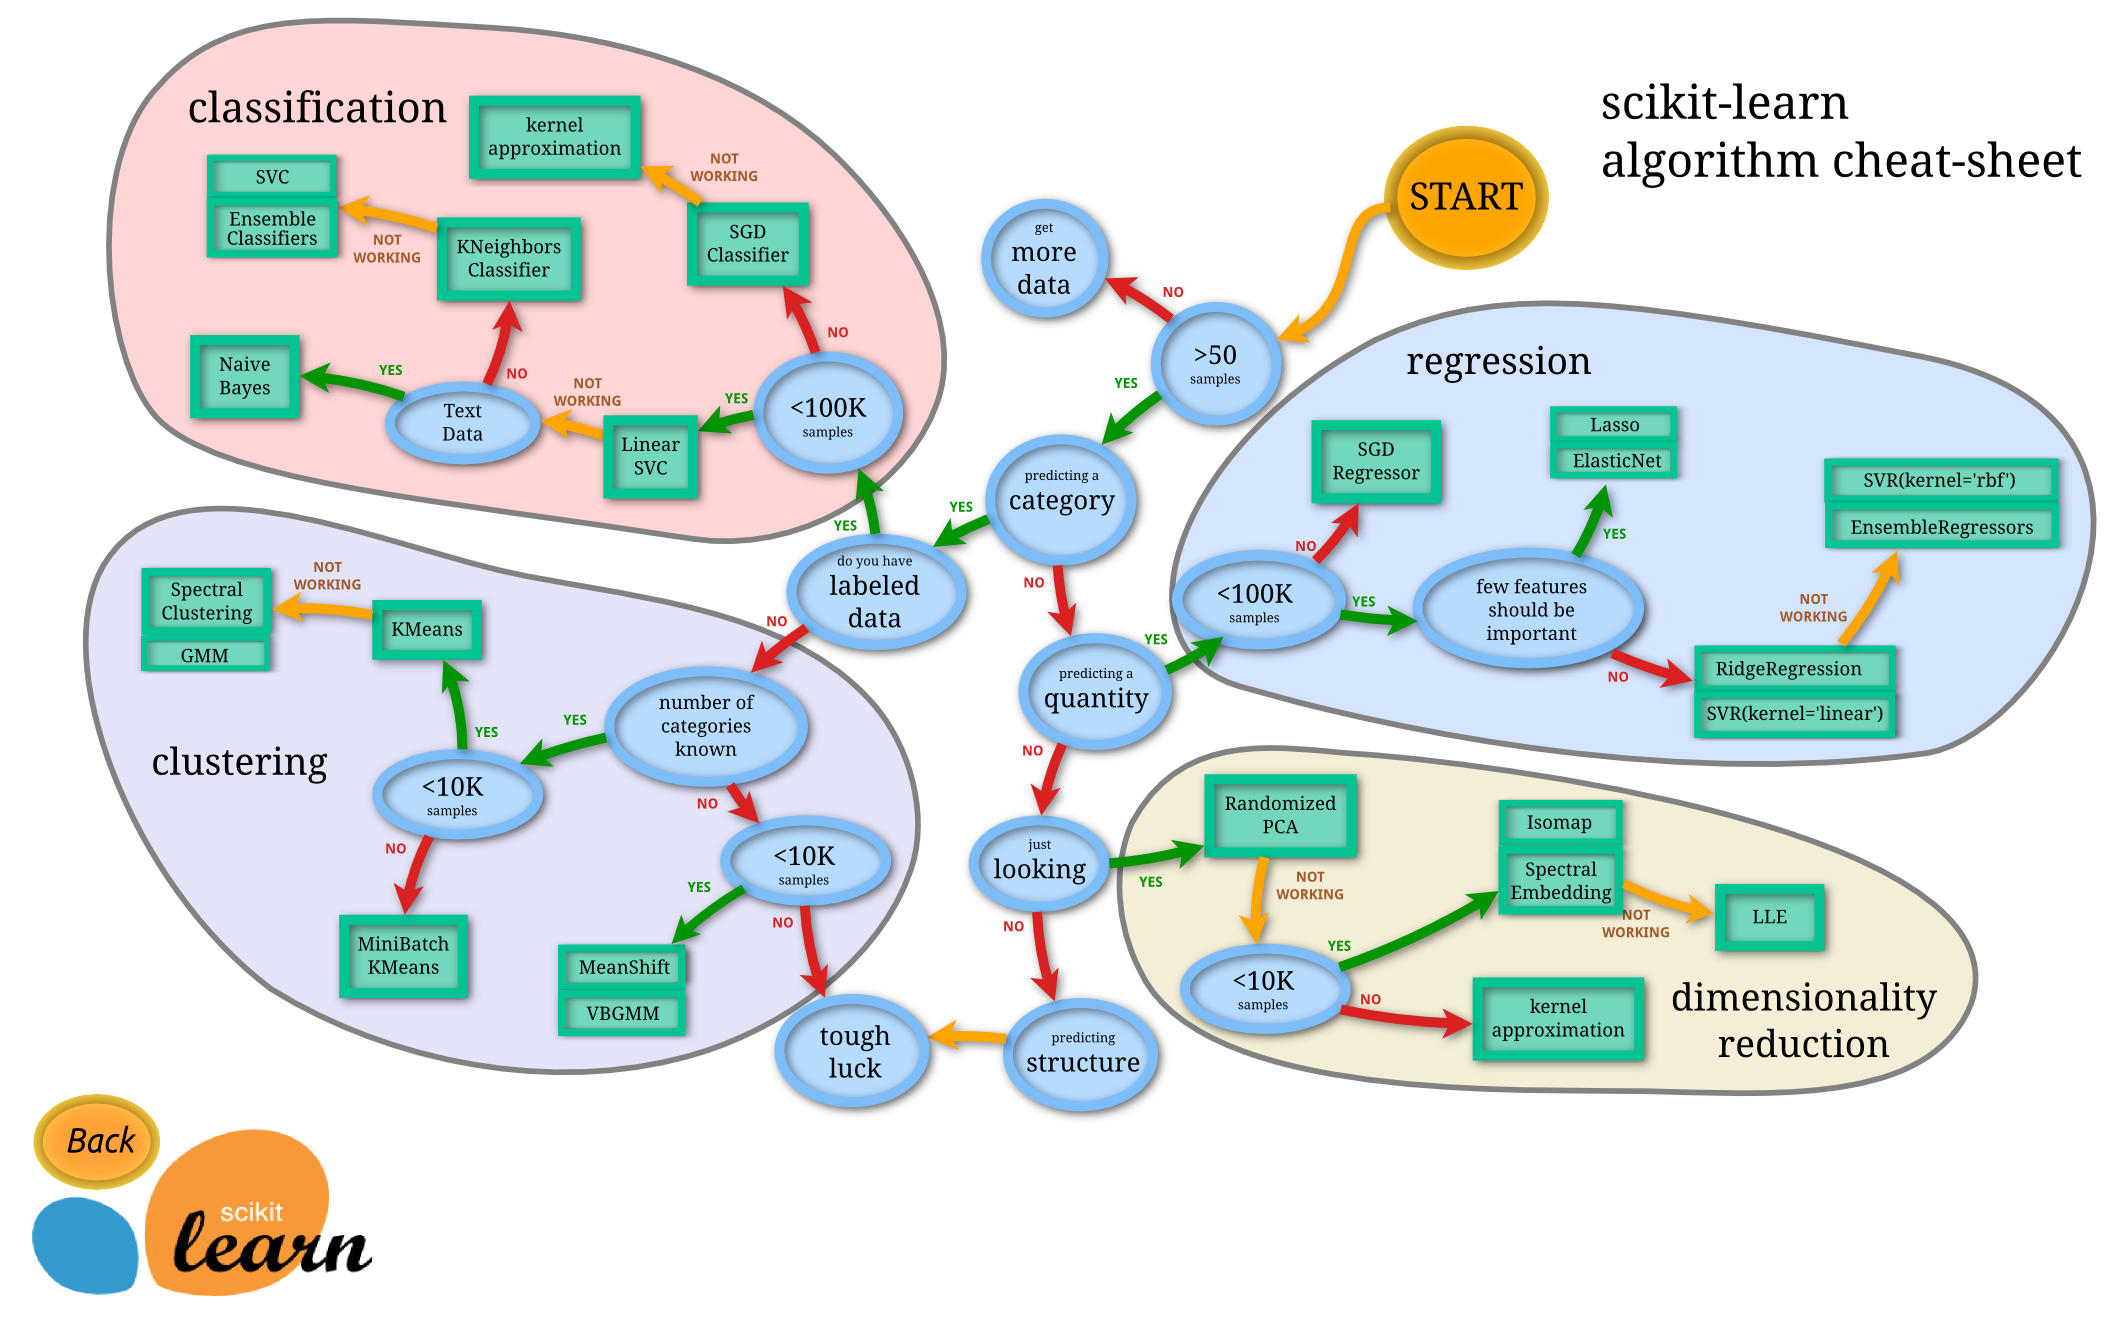

In [546]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png", width=800)

### Splitting the dataset into train and test sets

In [548]:
from sklearn.model_selection import train_test_split
#Selecting training and testing data
# Split the data into two DataFrames: X (features) and y (target variable)
X = df_encoded.iloc[:, 1:-1]  # Specify at least one column as a feature
y = df_encoded["Loan_Status"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

In [549]:
print ('X_train shape=', X_train.shape) # size of x_train
print ('X_test shape=', X_test.shape) # size of x_test
print ('y_train shape=', y_train.shape) # size of y_train
print ('y_test shape=', y_test.shape) # size of y_test

X_train shape= (429, 11)
X_test shape= (185, 11)
y_train shape= (429,)
y_test shape= (185,)


### Logistic Regression

In [550]:
from sklearn.linear_model import LogisticRegression
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    "C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123,
}

# Create a logistic regression classifier object with the parameters above
logreg = LogisticRegression(**params)

# Train the classifer on the train set
logreg = logreg.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_logreg = logreg.predict(X_test)

In [551]:
y_pred_logreg

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Calculate Performance

In [552]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score, roc_auc_score, roc_curve

In [553]:
# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred_logreg)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

In [554]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test) )

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of logistic regression classifier: ", precision_score(y_test, y_pred_logreg)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of logistic regression classifier: ", recall_score(y_test, y_pred_logreg))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of logistic regression classifier: ", f1_score(y_test, y_pred_logreg)) 

Accuracy of logistic regression classifier:  0.772972972972973
Precision of logistic regression classifier:  0.7515923566878981
Recall of logistic regression classifier:  0.9752066115702479
F1 score of logistic regression classifier:  0.8489208633093525


In [555]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [556]:
from sklearn.model_selection import cross_val_score

#Calculate performance using cross-validation
cv_results_reglog = cross_val_score(logreg, X, y, cv=5)
print(cv_results_reglog)

[0.81300813 0.7804878  0.78861789 0.85365854 0.81967213]


In [557]:
mean_accuracy_logreg = np.mean(cv_results_reglog)
mean_accuracy_logreg

0.8110888977742234

### KNN

In [558]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# Fit knn to the train set
knn.fit(X_train, y_train)

# Predict test values using KNN
y_pred_knn = knn.predict(X_test)

In [559]:
y_pred_knn

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [560]:
# Print the confusion matrix of the knn model
confusion_matrix(y_test, y_pred_knn)

array([[ 20,  44],
       [  5, 116]], dtype=int64)

In [561]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of KNN classifier: ", knn.score(X_test, y_test))

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of KNN classifier: ", precision_score(y_test, y_pred_knn)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of KNN classifier: ", recall_score(y_test, y_pred_knn))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of KNN classifier: ", f1_score(y_test, y_pred_knn)) 

Accuracy of KNN classifier:  0.7351351351351352
Precision of KNN classifier:  0.725
Recall of KNN classifier:  0.9586776859504132
F1 score of KNN classifier:  0.8256227758007118


In [562]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.31      0.45        64
           1       0.72      0.96      0.83       121

    accuracy                           0.74       185
   macro avg       0.76      0.64      0.64       185
weighted avg       0.75      0.74      0.70       185



In [563]:
#Calculate performance using cross-validation
cv_results_knn = cross_val_score(knn, X, y, cv=5)
print(cv_results_knn)

[0.7804878  0.74796748 0.76422764 0.77235772 0.7295082 ]


In [564]:
mean_accuracy_knn = np.mean(cv_results_knn)
mean_accuracy_knn

0.7589097694255631

### Decision Tree

In [565]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 6,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
dt = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
dt = dt.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_dt = dt.predict(X_test)

In [566]:
y_pred_dt

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

[Text(0.5, 0.75, 'Credit_History <= 0.5\ngini = 0.419\nsamples = 429\nvalue = [128, 301]'),
 Text(0.25, 0.25, 'gini = 0.121\nsamples = 62\nvalue = [58, 4]'),
 Text(0.75, 0.25, 'gini = 0.309\nsamples = 367\nvalue = [70, 297]')]

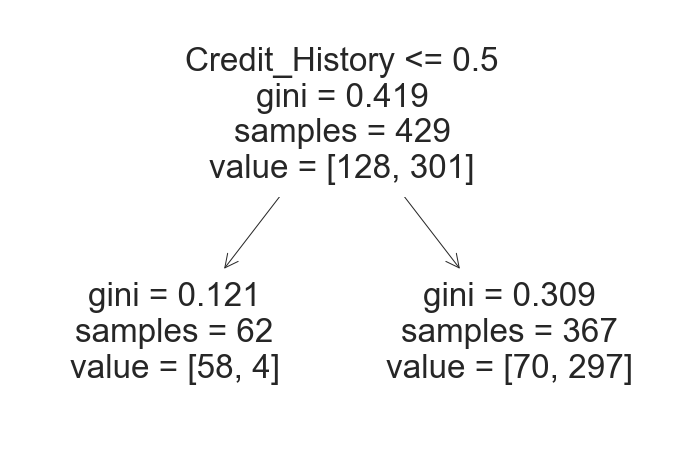

In [567]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X.columns)

In [568]:
# Print the confusion matrix of the decision tree model
confusion_matrix(y_test, y_pred_dt)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

In [569]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of Decision Tree classifier: ", dt.score(X_test, y_test))

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of Decision Tree classifier: ", precision_score(y_test, y_pred_dt)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of Decision Tree classifier: ", recall_score(y_test, y_pred_dt))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of Decision Tree classifier: ", f1_score(y_test, y_pred_dt)) 

Accuracy of Decision Tree classifier:  0.772972972972973
Precision of Decision Tree classifier:  0.7515923566878981
Recall of Decision Tree classifier:  0.9752066115702479
F1 score of Decision Tree classifier:  0.8489208633093525


In [570]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [571]:
#Calculate performance using cross-validation
cv_results_dt = cross_val_score(dt, X, y, cv=5)
print(cv_results_dt)

[0.81300813 0.7804878  0.78861789 0.85365854 0.81967213]


In [572]:
mean_accuracy_dt = np.mean(cv_results_dt)
mean_accuracy_dt

0.8110888977742234

### Random Forest

In [573]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

# Fit Random Forest to the train set
rf.fit(X_train, y_train)

# Predict test values using Random Forest
y_pred_rf = rf.predict(X_test)

In [574]:
y_pred_rf

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [575]:
# Print the confusion matrix of the Random Forest model
confusion_matrix(y_test, y_pred_rf)

array([[ 26,  38],
       [  7, 114]], dtype=int64)

In [576]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of Random Forest classifier: ", rf.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of Random Forest classifier: ", precision_score(y_test, y_pred_rf)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of Random Forest classifier: ", recall_score(y_test, y_pred_rf))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of Random Forest classifier: ", f1_score(y_test, y_pred_rf))

Accuracy of Random Forest classifier:  0.7567567567567568
Precision of Random Forest classifier:  0.75
Recall of Random Forest classifier:  0.9421487603305785
F1 score of Random Forest classifier:  0.8351648351648352


In [577]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        64
           1       0.75      0.94      0.84       121

    accuracy                           0.76       185
   macro avg       0.77      0.67      0.69       185
weighted avg       0.76      0.76      0.73       185



In [578]:
#Calculate performance using cross-validation
cv_results_rf = cross_val_score(rf, X, y, cv=5)
print(cv_results_rf)

[0.78861789 0.75609756 0.7804878  0.82926829 0.80327869]


In [579]:
mean_accuracy_rf = np.mean(cv_results_rf)
mean_accuracy_rf

0.7915500466480074

### SVM

In [580]:
from sklearn.svm import SVC

#### Using Linear kernel

In [581]:
linear_SVM = SVC(kernel='linear')

# Fit Linear SVM to the train set
linear_SVM.fit(X_train, y_train)

# Predict test values using Linear SVM
y_pred_SVM_l = linear_SVM.predict(X_test)

In [582]:
y_pred_SVM_l

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [583]:
# Print the confusion matrix of the Linear SVM model
confusion_matrix(y_test, y_pred_SVM_l)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

In [584]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of Linear SVM classifier: ", linear_SVM.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of Linear SVM classifier: ", precision_score(y_test, y_pred_SVM_l)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of Linear SVM classifier: ", recall_score(y_test, y_pred_SVM_l))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of Linear SVM classifier: ", f1_score(y_test, y_pred_SVM_l)) 

Accuracy of Linear SVM classifier:  0.772972972972973
Precision of Linear SVM classifier:  0.7515923566878981
Recall of Linear SVM classifier:  0.9752066115702479
F1 score of Linear SVM classifier:  0.8489208633093525


In [585]:
print(classification_report(y_test, y_pred_SVM_l))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [586]:
#Calculate performance using cross-validation
cv_results_lsvm = cross_val_score(linear_SVM, X, y, cv=5)
print(cv_results_lsvm)

[0.81300813 0.7804878  0.78861789 0.85365854 0.81967213]


In [587]:
mean_accuracy_lsvm = np.mean(cv_results_lsvm)
mean_accuracy_lsvm

0.8110888977742234

#### Using rbf kernel

In [588]:
rbf_SVM = SVC(kernel='rbf')

# Fit Linear SVM to the train set
rbf_SVM.fit(X_train, y_train)

# Predict test values using RBF SVM
y_pred_SVM_rbf = rbf_SVM.predict(X_test)

In [589]:
# Print the confusion matrix of the RBF SVM model
confusion_matrix(y_test, y_pred_SVM_rbf)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

In [590]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of RBF SVM classifier: ", rbf_SVM.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of RBF SVM classifier: ", precision_score(y_test, y_pred_SVM_rbf)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of RBF SVM classifier: ", recall_score(y_test, y_pred_SVM_rbf))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of RBF SVM classifier: ", f1_score(y_test, y_pred_SVM_rbf)) 

Accuracy of RBF SVM classifier:  0.772972972972973
Precision of RBF SVM classifier:  0.7515923566878981
Recall of RBF SVM classifier:  0.9752066115702479
F1 score of RBF SVM classifier:  0.8489208633093525


In [591]:
print(classification_report(y_test, y_pred_SVM_rbf))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [592]:
#Calculate performance using cross-validation
cv_results_rbf = cross_val_score(rbf_SVM, X, y, cv=5)
print(cv_results_rbf)

[0.81300813 0.7804878  0.78861789 0.85365854 0.81967213]


In [593]:
mean_accuracy_rbf = np.mean(cv_results_rbf)
mean_accuracy_rbf

0.8110888977742234

### Naive Bayes

In [594]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = naive_bayes.predict(X_test)

In [595]:
# Print the confusion matrix of the Naive Bayes model
confusion_matrix(y_test, y_pred_nb)

array([[ 29,  35],
       [  8, 113]], dtype=int64)

In [596]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of Naive Bayes classifier: ", naive_bayes.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of Naive Bayes classifier: ", precision_score(y_test, y_pred_nb)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of Naive Bayes classifier: ", recall_score(y_test, y_pred_nb))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of Naive Bayes classifier: ", f1_score(y_test, y_pred_nb)) 

Accuracy of Naive Bayes classifier:  0.7675675675675676
Precision of Naive Bayes classifier:  0.7635135135135135
Recall of Naive Bayes classifier:  0.9338842975206612
F1 score of Naive Bayes classifier:  0.8401486988847584


In [597]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.45      0.57        64
           1       0.76      0.93      0.84       121

    accuracy                           0.77       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.77      0.77      0.75       185



In [598]:
#Calculate performance using cross-validation
cv_results_nb = cross_val_score(naive_bayes, X, y, cv=5)
print(cv_results_nb)

[0.80487805 0.74796748 0.7804878  0.82926829 0.81147541]


In [599]:
mean_accuracy_nb = np.mean(cv_results_nb)
mean_accuracy_nb

0.7948154071704651

### Gradient Boosting Algorithms
Ensemble learning methods that combine multiple weak learners (typically decision trees) to create a strong predictive model. They are known for their high accuracy and are widely used in various classification tasks.

### XGBoost

In [600]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
xgb_cl.fit(X_train, y_train)
y_pred_xgb = xgb_cl.predict(X_test)
y_pred_xgb

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [601]:
# Print the confusion matrix of the XGBoost model
confusion_matrix(y_test, y_pred_xgb)

array([[ 27,  37],
       [  5, 116]], dtype=int64)

In [602]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of XGBoost classifier: ", xgb_cl.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of XGBoost classifier: ", precision_score(y_test, y_pred_xgb)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of XGBoost classifier: ", recall_score(y_test, y_pred_xgb))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of XGBoost classifier: ", f1_score(y_test, y_pred_xgb)) 

Accuracy of XGBoost classifier:  0.772972972972973
Precision of XGBoost classifier:  0.7581699346405228
Recall of XGBoost classifier:  0.9586776859504132
F1 score of XGBoost classifier:  0.8467153284671532


In [603]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56        64
           1       0.76      0.96      0.85       121

    accuracy                           0.77       185
   macro avg       0.80      0.69      0.70       185
weighted avg       0.79      0.77      0.75       185



In [604]:
#Calculate performance using cross-validation
cv_results_xgb = cross_val_score(xgb_cl, X, y, cv=5)
print(cv_results_xgb)

[0.7804878  0.76422764 0.77235772 0.81300813 0.81967213]


In [605]:
mean_accuracy_xgb = np.mean(cv_results_xgb)
mean_accuracy_xgb

0.7899506863921099

In [606]:
#Cross-validation in XGBoost
loan_dmatrix = xgb.DMatrix(data=df_encoded.iloc[:,1:-1], label=df_encoded.Loan_Status)
params={"objective":"binary:logistic", "max_depth":4}
cv_results = xgb.cv(dtrain=loan_dmatrix, params=params, nfold=5, num_boost_round=10, metrics="error", as_pandas=True)
print("Accuracy:%f" %((1-cv_results['test-error-mean']).iloc[-1]))

Accuracy:0.806171


### LightGBM

In [607]:
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(objective='binary', n_estimators=10, learning_rate=0.1, max_depth=1, random_state=123)
clf_lgb.fit(X_train, y_train)
y_pred_lgb = clf_lgb.predict(X_test)
y_pred_lgb

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [608]:
# Print the confusion matrix of the XGBoost model
confusion_matrix(y_test, y_pred_lgb)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

In [609]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of LightGBM classifier: ", clf_lgb.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of LightGBM classifier: ", precision_score(y_test, y_pred_lgb)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of LightGBM classifier: ", recall_score(y_test, y_pred_lgb))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of LightGBM classifier: ", f1_score(y_test, y_pred_lgb)) 

Accuracy of LightGBM classifier:  0.772972972972973
Precision of LightGBM classifier:  0.7515923566878981
Recall of LightGBM classifier:  0.9752066115702479
F1 score of LightGBM classifier:  0.8489208633093525


In [610]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [611]:
#Calculate performance using cross-validation
cv_results_lgb = cross_val_score(clf_lgb, X, y, cv=5)
print(cv_results_lgb)

[0.81300813 0.7804878  0.78861789 0.85365854 0.81967213]


In [612]:
mean_accuracy_lgb = np.mean(cv_results_lgb)
mean_accuracy_lgb

0.8110888977742234

### Catboost 

In [613]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier
catboost_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
catboost_clf.fit(X_train, y_train)
y_pred_catboost = catboost_clf.predict(X_test)

y_pred_catboost

0:	learn: 0.6639848	total: 6.33ms	remaining: 627ms
1:	learn: 0.6388646	total: 13.9ms	remaining: 683ms
2:	learn: 0.6123624	total: 19.9ms	remaining: 643ms
3:	learn: 0.5899947	total: 26ms	remaining: 625ms
4:	learn: 0.5735885	total: 31.8ms	remaining: 603ms
5:	learn: 0.5540795	total: 34ms	remaining: 533ms
6:	learn: 0.5420597	total: 40.5ms	remaining: 538ms
7:	learn: 0.5282299	total: 44ms	remaining: 506ms
8:	learn: 0.5190950	total: 49.7ms	remaining: 502ms
9:	learn: 0.5100394	total: 54.2ms	remaining: 488ms
10:	learn: 0.5021920	total: 57.9ms	remaining: 468ms
11:	learn: 0.4936079	total: 60.6ms	remaining: 445ms
12:	learn: 0.4853142	total: 61.5ms	remaining: 411ms
13:	learn: 0.4799711	total: 64.2ms	remaining: 395ms
14:	learn: 0.4745969	total: 66.4ms	remaining: 376ms
15:	learn: 0.4690231	total: 67.7ms	remaining: 356ms
16:	learn: 0.4640077	total: 69ms	remaining: 337ms
17:	learn: 0.4602400	total: 71ms	remaining: 323ms
18:	learn: 0.4565331	total: 71.8ms	remaining: 306ms
19:	learn: 0.4529439	total: 73.6

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [614]:
# Print the confusion matrix of the catboost model
confusion_matrix(y_test, y_pred_catboost)

array([[ 25,  39],
       [  3, 118]], dtype=int64)

In [615]:
# The X_test and y_test parameters represent the features and labels of the testing data (y_test represents the true values)

# The accuracy score evaluates the model on the testing data where accuracy is the fraction of correctly classified samples
print("Accuracy of CatBoost classifier: ", catboost_clf.score(X_test, y_test)) 

# Precision is the percentage of positive predictions that are actually correct 
print("Precision of CatBoost classifier: ", precision_score(y_test, y_pred_catboost)) 

# Recall is the percentage of actual positive cases that were correctly predicted by the model
print("Recall of CatBoost classifier: ", recall_score(y_test, y_pred_catboost))

# The F1 score is a measure of the balance between precision and recall
print("F1 score of CatBoost classifier: ", f1_score(y_test, y_pred_catboost)) 

Accuracy of CatBoost classifier:  0.772972972972973
Precision of CatBoost classifier:  0.7515923566878981
Recall of CatBoost classifier:  0.9752066115702479
F1 score of CatBoost classifier:  0.8489208633093525


In [616]:
print(classification_report(y_test, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.89      0.39      0.54        64
           1       0.75      0.98      0.85       121

    accuracy                           0.77       185
   macro avg       0.82      0.68      0.70       185
weighted avg       0.80      0.77      0.74       185



In [617]:
#Calculate performance using cross-validation
cv_results_cb = cross_val_score(catboost_clf, X, y, cv=5)
print(cv_results_cb)

0:	learn: 0.6635607	total: 1.22ms	remaining: 121ms
1:	learn: 0.6405032	total: 2.47ms	remaining: 121ms
2:	learn: 0.6160612	total: 3.65ms	remaining: 118ms
3:	learn: 0.5950315	total: 4.95ms	remaining: 119ms
4:	learn: 0.5779684	total: 6.28ms	remaining: 119ms
5:	learn: 0.5609054	total: 6.71ms	remaining: 105ms
6:	learn: 0.5484297	total: 7.99ms	remaining: 106ms
7:	learn: 0.5366054	total: 8.69ms	remaining: 100ms
8:	learn: 0.5276300	total: 9.9ms	remaining: 100ms
9:	learn: 0.5199113	total: 11ms	remaining: 99.4ms
10:	learn: 0.5123567	total: 12.3ms	remaining: 99.2ms
11:	learn: 0.5035874	total: 13.5ms	remaining: 99.3ms
12:	learn: 0.4966055	total: 14ms	remaining: 93.7ms
13:	learn: 0.4905810	total: 15.2ms	remaining: 93.5ms
14:	learn: 0.4849606	total: 16.4ms	remaining: 93.1ms
15:	learn: 0.4799093	total: 17.6ms	remaining: 92.2ms
16:	learn: 0.4741329	total: 18.7ms	remaining: 91.1ms
17:	learn: 0.4695300	total: 19.8ms	remaining: 90.1ms
18:	learn: 0.4658391	total: 21ms	remaining: 89.5ms
19:	learn: 0.462111

In [618]:
mean_accuracy_cb = np.mean(cv_results_cb)
mean_accuracy_cb

0.8127282420365187

## Comparison

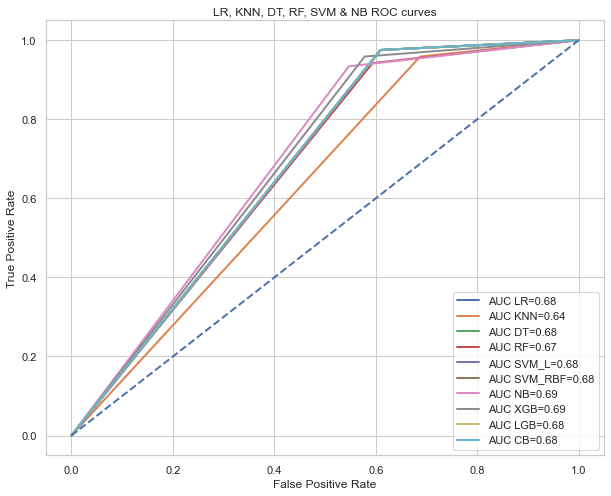

In [619]:
from sklearn import metrics
plt.figure(figsize=(10, 8))

fpr2,tpr2,thr2 = metrics.roc_curve(y_test, y_pred_logreg) # Logistic Regression
fpr3,tpr3,thr3 = metrics.roc_curve(y_test, y_pred_knn) # KNN
fpr4,tpr4,thr4 = metrics.roc_curve(y_test, y_pred_dt) # Decision Tree
fpr5,tpr5,thr5 = metrics.roc_curve(y_test, y_pred_rf) # Random Forest
fpr6,tpr6,thr6 = metrics.roc_curve(y_test, y_pred_SVM_l) # Linear SVM
fpr7,tpr7,thr7= metrics.roc_curve(y_test, y_pred_SVM_rbf) # RBF SVM
fpr8,tpr8,thr8= metrics.roc_curve(y_test, y_pred_nb) # Naive Bayes
fpr9,tpr9,thr9= metrics.roc_curve(y_test, y_pred_xgb) # XGBoost
fpr10,tpr10,thr10= metrics.roc_curve(y_test, y_pred_lgb) # LightGBM
fpr11,tpr11,thr11= metrics.roc_curve(y_test, y_pred_catboost) # LightGBM


auc2 = metrics.auc(fpr2,tpr2) # Logistic Regression
auc3 = metrics.auc(fpr3,tpr3) # KNN
auc4 = metrics.auc(fpr4,tpr4) # Decision Tree
auc5 = metrics.auc(fpr5,tpr5) # Random Forest
auc6 = metrics.auc(fpr6,tpr6) # Linear SVM
auc7 = metrics.auc(fpr7,tpr7) # RBF SVM
auc8 = metrics.auc(fpr8,tpr8) # Naive Bayes
auc9 = metrics.auc(fpr9,tpr9) # XGBoost
auc10 = metrics.auc(fpr10,tpr10) # LightGBM
auc11 = metrics.auc(fpr11,tpr11) # CatBoost


plt.plot(fpr2,tpr2,'-', lw=2, label='AUC LR=%.2f'%auc2) # Logistic Regression
plt.plot(fpr3,tpr3,'-', lw=2, label='AUC KNN=%.2f'%auc3) # KNN
plt.plot(fpr4,tpr4,'-', lw=2, label='AUC DT=%.2f'%auc4) # Decision Tree
plt.plot(fpr5,tpr5,'-', lw=2, label='AUC RF=%.2f'%auc5) # Random Forest
plt.plot(fpr6,tpr6,'-', lw=2, label='AUC SVM_L=%.2f'%auc6) # Linear SVM
plt.plot(fpr7,tpr7,'-', lw=2, label='AUC SVM_RBF=%.2f'%auc7) # RBF SVM
plt.plot(fpr8,tpr8,'-', lw=2, label='AUC NB=%.2f'%auc8) # Naive Bayes
plt.plot(fpr9,tpr9,'-', lw=2, label='AUC XGB=%.2f'%auc9) # XGBoost
plt.plot(fpr10,tpr10,'-', lw=2, label='AUC LGB=%.2f'%auc10) # LightGBM
plt.plot(fpr11,tpr11,'-', lw=2, label='AUC CB=%.2f'%auc11) # CatBoost


plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR, KNN, DT, RF, SVM & NB ROC curves')
plt.legend(loc='lower right')
plt.show()

The receiver operating characteristic (ROC) curve is a graphical representation of the performance of a classification model. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity).

In our loan prediction problem, we evaluated several machine learning algorithms and calculated their respective area under the ROC curve (AUC-ROC) scores. The AUC-ROC score is a metric that measures the overall performance of a binary classification model.

The AUC-ROC scores range from 0 to 1, with a score of 0.5 indicating a random classifier and a score of 1 indicating a perfect classifier. Based on the scores obtained, we can make the following observations:

- Naive Bayes and XGBoost achieved the highest AUC-ROC scores of 0.69, indicating better overall performance compared to other algorithms.
- Logistic Regression, Decision Tree, Linear SVM, LightGBM, and CatBoost achieved similar AUC-ROC scores of around 0.68, suggesting comparable performance.
- K-Nearest Neighbors and Random Forest obtained slightly lower AUC-ROC scores of 0.64 and 0.67, respectively.

It's important to note that the AUC-ROC score alone may not provide a complete evaluation of the model's performance. It's advisable to consider other metrics such as accuracy, precision, recall, and F1 score to gain a comprehensive understanding of the model's strengths and weaknesses.

Overall, based on the AUC-ROC scores, the Naive Bayes and XGBoost algorithms demonstrate slightly better performance in predicting loan approval compared to other algorithms in our analysis.

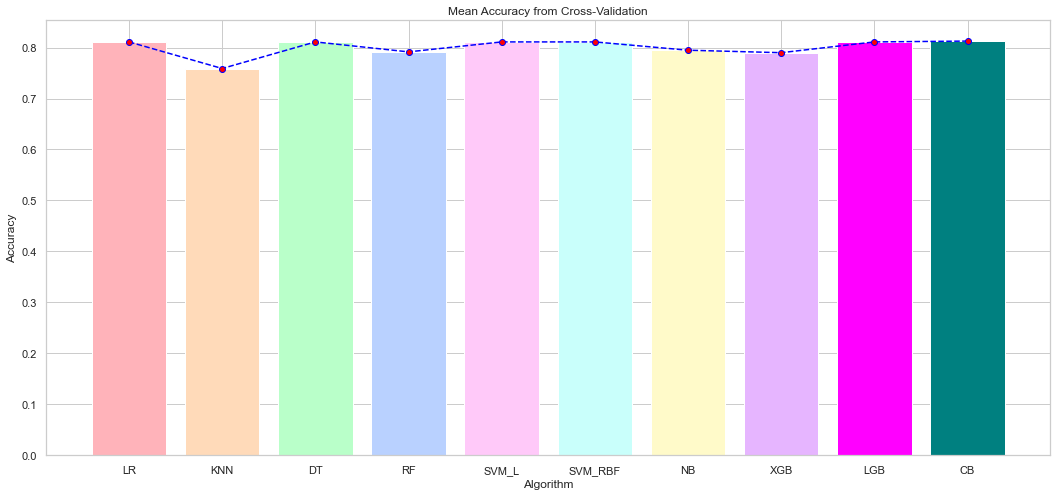

In [620]:
plt.figure(figsize=(18,8))

# Define the mean accuracies for each algorithm
mean_accuracies = [mean_accuracy_logreg, mean_accuracy_knn, mean_accuracy_dt, mean_accuracy_rf, mean_accuracy_lsvm, mean_accuracy_rbf, mean_accuracy_nb, mean_accuracy_xgb, mean_accuracy_lgb, mean_accuracy_cb]

# Define colors for each category
colors = ['#FFB3BA', '#FFDAB9', '#B9FFC9', '#B9D1FF', '#FFC9F9', '#C9FFFB', '#FFFAC9', '#E6B5FF', '#FF00FF', '#008080']

# Create a bar plot
plt.bar(range(len(mean_accuracies)), mean_accuracies, color=colors)

# Line plot with dashed line style, highlighting the maximum accuracy
plt.plot(range(len(mean_accuracies)), mean_accuracies, color='blue', linestyle='--', marker='o', markersize=6, markerfacecolor='red')

# Add labels for each algorithm
alorithm_labels=['LR', 'KNN', 'DT', 'RF', 'SVM_L', 'SVM_RBF', 'NB', 'XGB', 'LGB', 'CB']
plt.xticks(range(len(mean_accuracies)), alorithm_labels)  
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy from Cross-Validation')
plt.show()

In [621]:
mean_accuracies

[0.8110888977742234,
 0.7589097694255631,
 0.8110888977742234,
 0.7915500466480074,
 0.8110888977742234,
 0.8110888977742234,
 0.7948154071704651,
 0.7899506863921099,
 0.8110888977742234,
 0.8127282420365187]

The bar plot provides an overview of the performance of each algorithm based on the mean accuracy obtained from cross-validation. The mean accuracy represents the average accuracy achieved by each algorithm across multiple cross-validation folds.

Here are the mean accuracies for each algorithm:

- Logistic Regression: 0.811
- K-Nearest Neighbors (KNN): 0.759
- Decision Tree: 0.811
- Random Forest: 0.792
- Linear SVM: 0.811
- RBF SVM: 0.811
- Naive Bayes: 0.795
- XGBoost: 0.790
- LightGBM: 0.811
- CatBoost: 0.813

The height of each bar represents the mean accuracy value for the corresponding algorithm. By comparing the heights of the bars, we can observe the relative performance of each algorithm.

Based on the mean accuracies, we can make the following interpretations:

- CatBoost achieved the highest mean accuracy of 0.813, indicating that it performs slightly better in predicting loan approval compared to other algorithms.
- Logistic Regression, Decision Tree, Linear SVM, RBF SVM and LightGBM all achieved a mean accuracy of around 0.811, suggesting similar performance among these algorithms.
- Naive Bayes obtained a mean accuracy of 0.795, indicating a slightly lower but still competitive performance.
- K-Nearest Neighbors (KNN) and XGBoost achieved mean accuracies of 0.759 and 0.790, respectively, indicating relatively lower performance compared to the other algorithms.
- Random Forest obtained mean accuracies of 0.792 positioning it between the higher and lower performing algorithms.

It's important to note that the mean accuracy alone may not provide a complete evaluation of the model's performance. Consideration of other metrics, such as precision, recall, and F1 score, can provide a more comprehensive assessment.

In summary, based on the mean accuracy values from cross-validation, CatBoost demonstrated the highest performance in predicting loan approval, followed closely by Logistic Regression, Decision Tree, Linear SVM, LightGBM, and RBF SVM. Naive Bayes, XGBoost, Random Forest, and K-Nearest Neighbors achieved slightly lower mean accuracies but still exhibited competitive performance.

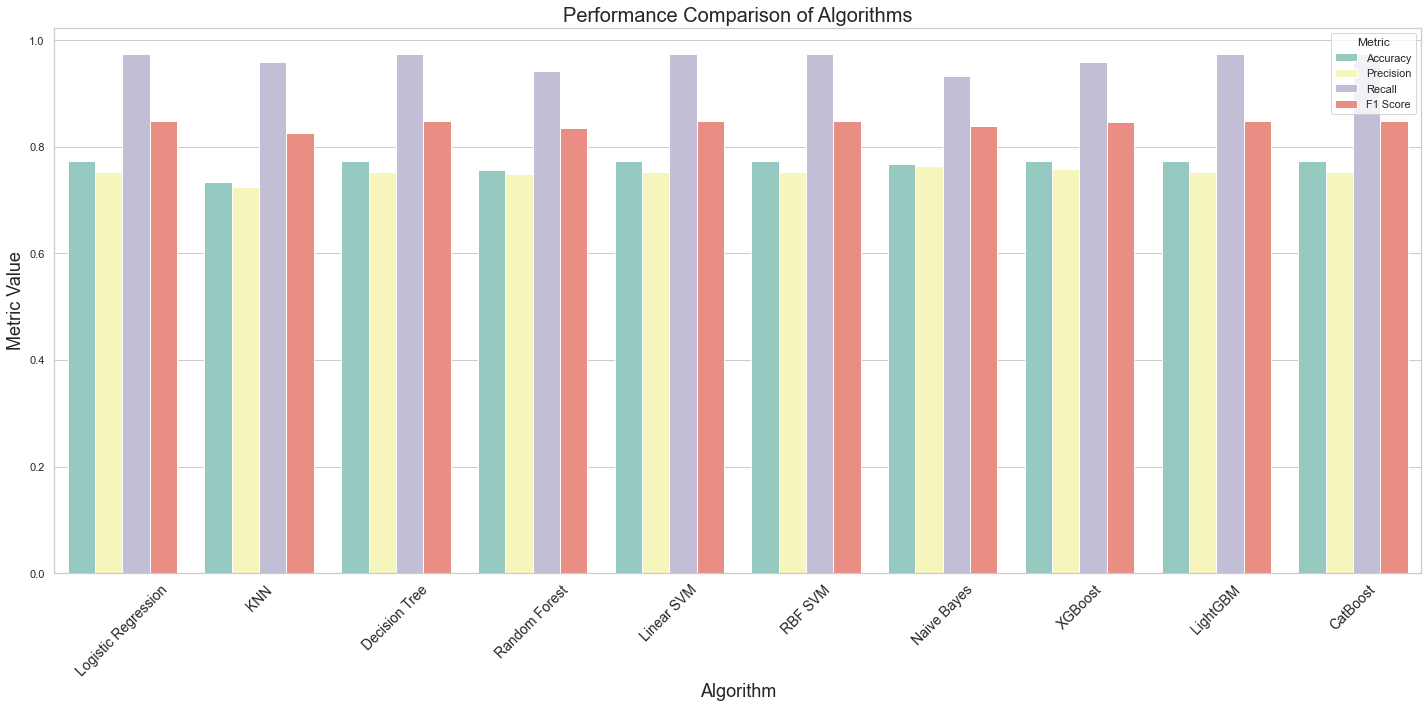

In [648]:
# Define the algorithms and their corresponding metrics
algorithms = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Linear SVM', 'RBF SVM', 'Naive Bayes', 'XGBoost', 'LightGBM', 'CatBoost']
accuracy = [0.773, 0.735, 0.773, 0.757, 0.773, 0.773, 0.768, 0.773, 0.773, 0.773]
precision = [0.752, 0.725, 0.752, 0.75, 0.752, 0.752, 0.764, 0.758, 0.752, 0.752]
recall = [0.975, 0.959, 0.975, 0.942, 0.975, 0.975, 0.934, 0.959, 0.975, 0.975]
f1_score = [0.849, 0.826, 0.849, 0.835, 0.849, 0.849, 0.84, 0.847, 0.849, 0.849]

# Create a DataFrame to hold the data
data = {
    'Algorithm': algorithms,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}
df = pd.DataFrame(data)

# Set the style of the plot
sns.set(style="whitegrid")

# Melt the DataFrame to reshape it for plotting
df_melted = df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value')

# Plot the grouped bar plot
plt.figure(figsize=(20,10))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_melted, palette='Set3')
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('Algorithm', fontsize=18)
plt.ylabel('Metric Value', fontsize=18)
plt.title('Performance Comparison of Algorithms', fontsize=20)
plt.legend(title='Metric')

# Show the plot
plt.tight_layout()
plt.show()


In [649]:
df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.773,0.752,0.975,0.849
1,KNN,0.735,0.725,0.959,0.826
2,Decision Tree,0.773,0.752,0.975,0.849
3,Random Forest,0.757,0.750,0.942,0.835
4,Linear SVM,0.773,0.752,0.975,0.849
5,RBF SVM,0.773,0.752,0.975,0.849
6,Naive Bayes,0.768,0.764,0.934,0.840
7,XGBoost,0.773,0.758,0.959,0.847
8,LightGBM,0.773,0.752,0.975,0.849
9,CatBoost,0.773,0.752,0.975,0.849


Based on these metrics, we can make the following observations:

- Logistic Regression, Decision Tree, Linear SVM, RBF SVM, LightGBM, and CatBoost all achieved similar results across the accuracy, precision, recall, and F1 score metrics. These algorithms have consistently high performance across different evaluation metrics.

- Naive Bayes, although having slightly lower accuracy compared to the above algorithms, still demonstrates a competitive performance with good precision, recall, and F1 score.

- K-Nearest Neighbors (KNN) and Random Forest have relatively lower accuracy and precision compared to other algorithms, but still show reasonable recall and F1 score.

- XGBoost performs well in terms of recall and F1 score, but its accuracy and precision are slightly lower compared to the top-performing algorithms.

Overall, considering the combination of accuracy, precision, recall, and F1 score, several algorithms stand out as top performers, including Logistic Regression, Decision Tree, Linear SVM, RBF SVM, LightGBM, and CatBoost. These algorithms exhibit a good balance of performance across multiple evaluation metrics and can be considered suitable choices for loan prediction tasks.

## Verdict and loan prediction

Considering the available information, it is challenging to definitively determine the best algorithm for loan prediction.
I found out that Logistic Regression, Decision Tree, Linear SVM and LightGBM have the same performance. So I'm going to choose the best one based on its caracteristics:

1) Logistic Regression: Logistic Regression is a simple and interpretable algorithm that works well for binary classification problems like loan prediction. It provides coefficients that can help in understanding the importance of features. It is computationally efficient and performs well when the data is linearly separable.

2) Decision Tree: Decision trees are intuitive and easy to interpret. They can capture complex non-linear relationships in the data. Decision trees are robust to outliers and can handle both numerical and categorical features. However, they may be prone to overfitting if not properly tuned.

3) Linear SVM: Linear SVM is effective when the data is linearly separable. It works well in high-dimensional spaces and is less prone to overfitting. SVM can handle both numerical and categorical features through proper encoding. It provides support vectors that can aid in understanding the decision boundaries.

4) LightGBM: LightGBM is a gradient boosting framework that often yields good performance in various machine learning tasks. It can handle both numerical and categorical features, automatically handles missing data, and is known for its efficient training speed. LightGBM generally performs well with large datasets and can capture complex interactions between features.

Based on these caracteristics we will use logistic regression for our loan prediction problem.

In [660]:
# Testing dataset
values_to_predict = dftest_encoded.iloc[:, 1:]

#Prediction
loan_prediction = logreg.predict(values_to_predict)

#Add predicted values to the test dataset
test['Predicted_Loan_Status'] = loan_prediction

#Preview
test.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
53,LP001298,Male,Yes,2,Graduate,No,4116,1000,30.0,180.0,1.0,Urban,1
261,LP002420,Male,Yes,0,Graduate,No,2982,1550,110.0,360.0,1.0,Semiurban,1
63,LP001347,Female,No,0,Graduate,No,2101,1500,108.0,360.0,0.0,Rural,0
264,LP002440,Male,Yes,2,Graduate,No,2995,1120,184.0,360.0,1.0,Rural,1
308,LP002744,Male,Yes,1,Graduate,No,6825,0,162.0,360.0,1.0,Rural,1


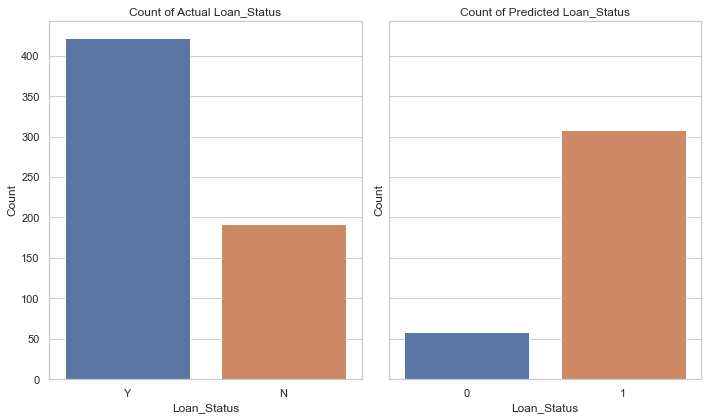

In [685]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)  # Adjust the figure size as needed

sns.countplot(x='Loan_Status', data=train, ax=ax[0])
sns.countplot(x='Predicted_Loan_Status', data=test, ax=ax[1])

ax[0].set_title('Count of Actual Loan_Status')
ax[0].set_xlabel('Loan_Status')
ax[0].set_ylabel('Count')

ax[1].set_title('Count of Predicted Loan_Status')
ax[1].set_xlabel('Loan_Status')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


It's interesting to observe that the predicted loan status in the test set also contains a higher number of "Yes" predictions compared to "No" predictions, similar to the actual values in the training set. 
This suggests that the model's predictions are consistent with the distribution of the target variable in the training data.

# Summary of my work

0) Data exploration: I had two datasets, one called "train" and the other called "test." The "train" dataset contained the loan_status target column, while the "test" dataset did not. this phase contains data understading and visualization.

1) Data Preparation:  I did the preparation tasks on both of the datasets.

2) Splitting the Data: I splited the "train" dataset into X_train and y_train, where X_train represents the features and y_train represents the loan_status target.

3) Algorithm Selection: I applied various algorithms, including logistic regression, K-nearest neighbors (KNN), decision tree, random forest, linear SVM, RBF SVM, naive Bayes, XGBoost, LightGBM, and CatBoost, for loan prediction.

4) Cross-Validation and Evaluation: I performed cross-validation using metrics such as mean accuracy and AUC-ROC to evaluate the performance of each algorithm. I also calculated additional metrics such as precision, recall, and F1 score.

5) Selection of Logistic Regression: Based on the evaluation results, I selected the logistic regression algorithm as the best performing model for loan prediction.

6) Prediction on Test Data: Using the trained logistic regression model, I made predictions on the test dataset, which did not have the loan_status column. These predictions provided the estimated loan_status values for the test data.

7) Analysis and Interpretation: I compared the distribution of predicted loan_status values in the test dataset to the distribution of loan_status values in the training dataset. This allowed me to observe how the predictions aligned with the overall loan_status distribution.